In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/diseasepred.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [10]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



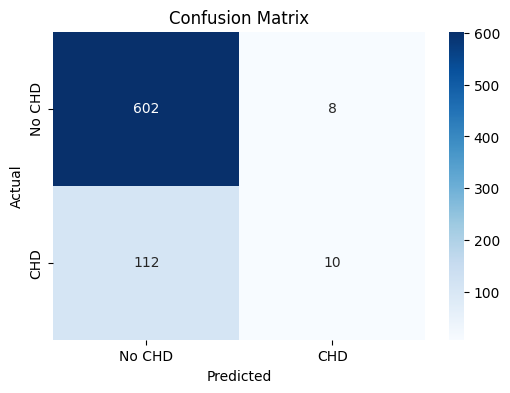

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()